In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [2]:
FAO = pd.read_pickle("FAO_clean_data.pkl")
HRCIOM= pd.read_pickle("HRCIOM_clean_data.pkl")
IFRC = pd.read_pickle("IFRC_clean_data.pkl")
UNDP = pd.read_pickle("UNDP_clean_data.pkl")
UNICEF = pd.read_pickle("UNICEF_clean_data.pkl")
WFP = pd.read_pickle("WFP_clean_data.pkl")
WHO = pd.read_pickle("WHO_clean_data.pkl")

In [3]:
frames = [FAO, HRCIOM, IFRC, UNDP,UNICEF, WFP, WHO ]
df = pd.concat(frames)

In [4]:
df

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,FAO,FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...",FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOWNS AN...,en,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,...","[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N...","[(global, a), (trendsforced, v), (displacement, a), (20192019, n), (review, n), (trends, n), (gl...","[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[(leaving, VBG), (millions, NNS), (behindworld, IN), (disasters, NNS), (report, VBP), (2018the, ...","[(leaving, v), (millions, n), (behindworld, n), (disasters, n), (report, v), (2018the, n), (inte...","[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu..."
0,UNDP,"Local, National, Global\n: \nEvaluative \nEvidence of Scaling up the SDGs\n Authors:\n Juha I....","[Local,, National,, Global, :, Evaluative, Evidence, of, Scaling, up, the, SDGs, Authors:, Juha,...","Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitto, Dir...",en,"[Local, ,, National, ,, Global, :, Evaluative, Evidence, of, Scaling, up, the, SDGs, Authors, :,...","[local, ,, national, ,, global, :, evaluative, evidence, of, scaling, up, the, sdgs, authors, :,...","[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i., u...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, i., uitto, directo...","[(local, JJ), (national, JJ), (global, JJ), (evaluative, JJ), 

### Recleanning

In [5]:
new_df = df[['cluster','words']]

In [6]:
new_df

,cluster,words
0,FAO,FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...
0,UNDP,"Local, National, Global\n: \nEvaluative \nEvidence of Scaling up the SDGs\n Authors:\n Juha I...."
0,UNICEF,"www.thelancet.com/lancetgh \n Vol 7 July 2019\n e849National, regional, and worldwide estimat..."
0,WFP,FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...
0,WHO,1WHAT IS THE \nWORLD \nREPORT ON VISION?WSD19 | What is World Sight Day?3WORLD REPORT \n ON VI...


In [7]:
new_df = new_df.replace('\n',' ', regex=True)

In [8]:
new_df

,cluster,words
0,FAO,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,HCR IOM,GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 a...
0,IFRC,Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must...
0,UNDP,"Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitt..."
0,UNICEF,"www.thelancet.com/lancetgh Vol 7 July 2019 e849National, regional, and worldwide estimates..."
0,WFP,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,WHO,1WHAT IS THE WORLD REPORT ON VISION?WSD19 | What is World Sight Day?3WORLD REPORT ON VISIO...


In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
new_df

,cluster,words
0,FAO,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,HCR IOM,GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 a...
0,IFRC,Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must...
0,UNDP,"Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitt..."
0,UNICEF,"www.thelancet.com/lancetgh Vol 7 July 2019 e849National, regional, and worldwide estimates..."
0,WFP,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,WHO,1WHAT IS THE WORLD REPORT ON VISION?WSD19 | What is World Sight Day?3WORLD REPORT ON VISIO...


In [11]:
# remove special character
new_df.columns=new_df.columns.str.replace('[#,@,&],www','')

C:\Users\mwamb\AppData\Local\Temp/ipykernel_7744/4060548100.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df.columns=new_df.columns.str.replace('[#,@,&],www','')


In [12]:
new_df

,cluster,words
0,FAO,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,HCR IOM,GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 a...
0,IFRC,Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must...
0,UNDP,"Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitt..."
0,UNICEF,"www.thelancet.com/lancetgh Vol 7 July 2019 e849National, regional, and worldwide estimates..."
0,WFP,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,WHO,1WHAT IS THE WORLD REPORT ON VISION?WSD19 | What is World Sight Day?3WORLD REPORT ON VISIO...


In [13]:
# removing numbers from strings of speciafied 
# column, here 'Name'
new_df['words'] = new_df['words'].str.replace('\d+', '')
  
# display output with numbers removed from 
# required strings
new_df

C:\Users\mwamb\AppData\Local\Temp/ipykernel_7744/2395585095.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['words'] = new_df['words'].str.replace('\d+', '')


,cluster,words
0,FAO,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,HCR IOM,GLOBAL TRENDSFORCED DISPLACEMENT IN IN REVIEW Trends at a Glance at the end of as a result o...
0,IFRC,Leaving Millions BehindWorld Disasters Report The international humanitarian sector must do ...
0,UNDP,"Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitt..."
0,UNICEF,"www.thelancet.com/lancetgh Vol July eNational, regional, and worldwide estimates of low ..."
0,WFP,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,WHO,WHAT IS THE WORLD REPORT ON VISION?WSD | What is World Sight Day?WORLD REPORT ON VISION L...


In [14]:
#Define the function to remove the punctuation
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text
# Apply to the DF series
new_df['words'] = new_df['words'].apply(remove_punctuations)

In [15]:
new_df

,cluster,words
0,FAO,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,HCR IOM,GLOBAL TRENDSFORCED DISPLACEMENT IN IN REVIEW Trends at a Glance at the end of as a result o...
0,IFRC,Leaving Millions BehindWorld Disasters Report The international humanitarian sector must do ...
0,UNDP,Local National Global Evaluative Evidence of Scaling up the SDGs Authors Juha I Uitt...
0,UNICEF,www thelancet com lancetgh Vol July eNational regional and worldwide estimates of low ...
0,WFP,FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOW...
0,WHO,WHAT IS THE WORLD REPORT ON VISION WSD What is World Sight Day WORLD REPORT ON VISION L...


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mwamb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
new_df['words'] = new_df['words'].str.lower()

In [18]:
new_df

,cluster,words
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...
0,WFP,food security and nutrition in the world the state of safeguarding against economic slowdow...
0,WHO,what is the world report on vision wsd what is world sight day world report on vision l...


In [19]:
new_stopwords = ["www","com","vol","thelancet","wsd",'cc','nc','sa','igo',]


In [20]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [21]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mwamb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
new_df['text_tokens'] = new_df['words'].apply(word_tokenize)

In [23]:
new_df

,cluster,words,text_tokens
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic..."
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...,"[global, trendsforced, displacement, in, in, review, trends, at, a, glance, at, the, end, of, as..."
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...,"[leaving, millions, behindworld, disasters, report, the, international, humanitarian, sector, mu..."
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...,"[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i, ui..."
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...,"[www, thelancet, com, lancetgh, vol, july, enational, regional, and, worldwide, estimates, of, l..."
0,WFP,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic..."
0,WHO,what is the world report on vision wsd what is world sight day world report on vision l...,"[what, is, the, world, report, on, vision, wsd, what, is, world, sight, day, world, report, on, ..."


In [24]:
new_df['text_tokens_nostopw'] = new_df['text_tokens'].apply(lambda x: [word for word in x if word not in stpwrd])

In [25]:
new_df

,cluster,words,text_tokens,text_tokens_nostopw
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic..."
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...,"[global, trendsforced, displacement, in, in, review, trends, at, a, glance, at, the, end, of, as...","[global, trendsforced, displacement, review, trends, glance, end, result, persecution, con˜ict, ..."
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...,"[leaving, millions, behindworld, disasters, report, the, international, humanitarian, sector, mu...","[leaving, millions, behindworld, disasters, report, international, humanitarian, sector, must, r..."
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...,"[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i, ui...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, uitto, director, i..."
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...,"[www, thelancet, com, lancetgh, vol, july, enational, regional, and, worldwide, estimates, of, l...","[lancetgh, july, enational, regional, worldwide, estimates, low, birthweight, trends, systematic..."
0,WFP,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic..."
0,WHO,what is the world report on vision wsd what is world sight day world report on vision l...,"[what, is, the, world, report, on, vision, wsd, what, is, world, sight, day, world, report, on, ...","[world, report, vision, world, sight, day, world, report, vision, launch, pack, messages, wrv, w..."


In [26]:
from nltk.stem.wordnet import WordNetLemmatizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in new_df["words"]]

In [28]:
# new_df['comments_lemmatized'] = new_df["text_tokens_nostopw"].apply(lemmatize_text)


In [29]:
# new_df

In [30]:
new_df['pos_tags'] = new_df['text_tokens_nostopw'].apply(nltk.tag.pos_tag)
new_df

,cluster,words,text_tokens,text_tokens_nostopw,pos_tags
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec..."
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...,"[global, trendsforced, displacement, in, in, review, trends, at, a, glance, at, the, end, of, as...","[global, trendsforced, displacement, review, trends, glance, end, result, persecution, con˜ict, ...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (review, NN), (trends, NNS), (glance, JJ..."
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...,"[leaving, millions, behindworld, disasters, report, the, international, humanitarian, sector, mu...","[leaving, millions, behindworld, disasters, report, international, humanitarian, sector, must, r...","[(leaving, VBG), (millions, NNS), (behindworld, IN), (disasters, NNS), (report, VBP), (internati..."
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...,"[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i, ui...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, uitto, director, i...","[(local, JJ), (national, JJ), (global, JJ), (evaluative, JJ), (evidence, NN), (scaling, VBG), (s..."
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...,"[www, thelancet, com, lancetgh, vol, july, enational, regional, and, worldwide, estimates, of, l...","[lancetgh, july, enational, regional, worldwide, estimates, low, birthweight, trends, systematic...","[(lancetgh, JJ), (july, NN), (enational, JJ), (regional, JJ), (worldwide, NN), (estimates, NNS),..."
0,WFP,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec..."
0,WHO,what is the world report on vision wsd what is world sight day world report on vision l...,"[what, is, the, world, report, on, vision, wsd, what, is, world, sight, day, world, report, on, ...","[world, report, vision, world, sight, day, world, report, vision, launch, pack, messages, wrv, w...","[(world, NN), (report, NN), (vision, NN), (world, NN), (sight, VBD), (day, NN), (world, NN), (re..."


In [31]:
from nltk.corpus import wordnet

In [32]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
new_df['wordnet_pos'] = new_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
new_df.head()

,cluster,words,text_tokens,text_tokens_nostopw,pos_tags,wordnet_pos
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,..."
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...,"[global, trendsforced, displacement, in, in, review, trends, at, a, glance, at, the, end, of, as...","[global, trendsforced, displacement, review, trends, glance, end, result, persecution, con˜ict, ...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (review, NN), (trends, NNS), (glance, JJ...","[(global, a), (trendsforced, v), (displacement, a), (review, n), (trends, n), (glance, a), (end,..."
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...,"[leaving, millions, behindworld, disasters, report, the, international, humanitarian, sector, mu...","[leaving, millions, behindworld, disasters, report, international, humanitarian, sector, must, r...","[(leaving, VBG), (millions, NNS), (behindworld, IN), (disasters, NNS), (report, VBP), (internati...","[(leaving, v), (millions, n), (behindworld, n), (disasters, n), (report, v), (international, a),..."
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...,"[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i, ui...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, uitto, director, i...","[(local, JJ), (national, JJ), (global, JJ), (evaluative, JJ), (evidence, NN), (scaling, VBG), (s...","[(local, a), (national, a), (global, a), (evaluative, a), (evidence, n), (scaling, v), (sdgs, a)..."
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...,"[www, thelancet, com, lancetgh, vol, july, enational, regional, and, worldwide, estimates, of, l...","[lancetgh, july, enational, regional, worldwide, estimates, low, birthweight, trends, systematic...","[(lancetgh, JJ), (july, NN), (enational, JJ), (regional, JJ), (worldwide, NN), (estimates, NNS),...","[(lancetgh, a), (july, n), (enational, a), (regional, a), (worldwide, n), (estimates, n), (low, ..."


In [33]:
wnl = WordNetLemmatizer()
new_df['lemmatized'] = new_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
new_df

,cluster,words,text_tokens,text_tokens_nostopw,pos_tags,wordnet_pos,lemmatized
0,FAO,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,...","[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."
0,HCR IOM,global trendsforced displacement in in review trends at a glance at the end of as a result o...,"[global, trendsforced, displacement, in, in, review, trends, at, a, glance, at, the, end, of, as...","[global, trendsforced, displacement, review, trends, glance, end, result, persecution, con˜ict, ...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (review, NN), (trends, NNS), (glance, JJ...","[(global, a), (trendsforced, v), (displacement, a), (review, n), (trends, n), (glance, a), (end,...","[global, trendsforced, displacement, review, trend, glance, end, result, persecution, con˜ict, v..."
0,IFRC,leaving millions behindworld disasters report the international humanitarian sector must do ...,"[leaving, millions, behindworld, disasters, report, the, international, humanitarian, sector, mu...","[leaving, millions, behindworld, disasters, report, international, humanitarian, sector, must, r...","[(leaving, VBG), (millions, NNS), (behindworld, IN), (disasters, NNS), (report, VBP), (internati...","[(leaving, v), (millions, n), (behindworld, n), (disasters, n), (report, v), (international, a),...","[leave, million, behindworld, disaster, report, international, humanitarian, sector, must, respo..."
0,UNDP,local national global evaluative evidence of scaling up the sdgs authors juha i uitt...,"[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i, ui...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, uitto, director, i...","[(local, JJ), (national, JJ), (global, JJ), (evaluative, JJ), (evidence, NN), (scaling, VBG), (s...","[(local, a), (national, a), (global, a), (evaluative, a), (evidence, n), (scaling, v), (sdgs, a)...","[local, national, global, evaluative, evidence, scale, sdgs, author, juha, uitto, director, inde..."
0,UNICEF,www thelancet com lancetgh vol july enational regional and worldwide estimates of low ...,"[www, thelancet, com, lancetgh, vol, july, enational, regional, and, worldwide, estimates, of, l...","[lancetgh, july, enational, regional, worldwide, estimates, low, birthweight, trends, systematic...","[(lancetgh, JJ), (july, NN), (enational, JJ), (regional, JJ), (worldwide, NN), (estimates, NNS),...","[(lancetgh, a), (july, n), (enational, a), (regional, a), (worldwide, n), (estimates, n), (low, ...","[lancetgh, july, enational, regional, worldwide, estimate, low, birthweight, trend, systematic, ..."
0,WFP,food security and nutrition in the world the state of safeguarding against economic slowdow...,"[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,...","[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."
0,WHO,what is the world report on vision wsd what is world sight day world report on vision l...,"[what, is, the, world, report, on, vision, wsd, what, is, world, sight, day, world, report, on, ...","[world, report, vision, world, sight, day, world, report

In [36]:
lemmatized_list = []
for x in new_df["lemmatized"]:
    for y in x:
        lemmatized_list.append(y)
        

In [37]:
type(lemmatized_list)

list

In [38]:
len(lemmatized_list)

763546

In [39]:
lemmatized_list

['food',
 'security',
 'nutrition',
 'world',
 'state',
 'safeguard',
 'economic',
 'slowdown',
 'downturnsdemocratic',
 'republic',
 'congo',
 'young',
 'woman',
 'sell',
 'fruit',
 'street',
 'market',
 'cover',
 'photograph',
 '©shutterstock',
 'valeriya',
 'anufriyeva',
 'flagship',
 'publication',
 'part',
 'state',
 'world',
 'series',
 'food',
 'agriculture',
 'organization',
 'united',
 'nation',
 'require',
 'citation',
 'fao',
 'ifad',
 'unicef',
 'wfp',
 'state',
 'food',
 'security',
 'nutrition',
 'world',
 'safeguard',
 'economic',
 'slowdown',
 'downturns',
 'rome',
 'fao',
 'licence',
 'designation',
 'employ',
 'presentation',
 'material',
 'information',
 'product',
 'imply',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'food',
 'agriculture',
 'organization',
 'united',
 'nation',
 'fao',
 'international',
 'fund',
 'agricultural',
 'development',
 'ifad',
 'united',
 'nation',
 'children™s',
 'fund',
 'unicef',
 'world',
 'food',
 'programme',
 'wfp',
 'world

In [40]:
#Seperate Hashtags and titles to lists
cluster_list = new_df["cluster"].tolist()

In [41]:
#Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

hash_matrix=vectorizer.fit_transform(lemmatized_list)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


 Feature names Identified :

['aa', 'aaaa', 'aaberge', 'aabl', 'aablconference', 'aadafe', 'aaeda', 'aah', 'aalst', 'aam', 'aan', 'aannex', 'aao', 'aap', 'aapos', 'aarathi', 'aarhus', 'aarr', 'aaustri', 'aauw', 'ab', 'ababa', 'abafafdaaeaa', 'abandon', 'abandonment', 'abascal', 'abasse', 'abate', 'abatement', 'abbara', 'abbas', 'abbasi', 'abbreviation', 'abbreviationsinthetableabovereferto', 'abc', 'abd', 'abda', 'abdalla', 'abdallah', 'abdcecddfedfc', 'abdel', 'abdelkhalek', 'abdi', 'abdominal', 'abdoulaye', 'abdourahm', 'abdreyeva', 'abduct', 'abduction', 'abdul', 'abdulaal', 'abdulah', 'abdulai', 'abdulaziz', 'abdulghane', 'abdull', 'abdulla', 'abdullah', 'abdulrazak', 'abdulrazza', 'abdulwasiu', 'abe', 'abeda', 'abel', 'abelgium', 'abell', 'abelsohn', 'abenom', 'abenomics', 'abera', 'abernathy', 'aberrant', 'aberration', 'abertis', 'abh', 'abi', 'abide', 'abidjan', 'abikiwater', 'abil', 'abilistic', 'abilities', 'ability', 'abilityisstrongamongthegroupofleastdevelopedcountries', '

In [43]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=4).fit(hash_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in new_df.index:
        if ( clusters[i] == group):
            print(cluster_list[i])
    


Group :  0 
-------------------

Group :  1 
-------------------

Group :  2 
-------------------

Group :  3 
-------------------
FAO
FAO
FAO
FAO
FAO
FAO
FAO


Sum of squared distances :  [680827.453534832, 673490.7481642988, 676138.9569038819, 669334.0643680254, 669772.3409212803, 668334.5097602592, 663806.2837726952, 662313.8585346749, 660300.5167352234, 656869.5257288503, 649996.5785036047, 652269.4012503058, 653625.91593053, 646498.7414441747]


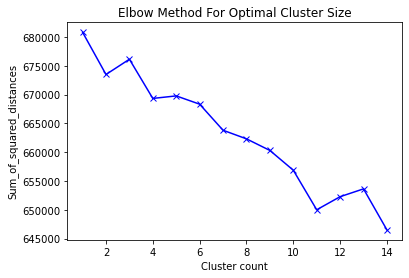

In [44]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()